# Assignment 3 Text Analysis
INST447 Spring 2021 - Farmer<br>
Miguel Ruiz


Resources
- https://docs.python.org/3/library/re.html
- https://www.dataquest.io/blog/regex-cheatsheet/
- http://www.pyregex.com/

In [1]:
# import modules
import re, os
import pandas as pd
import numpy as np

datapath = "../data/" # change to your location

# Part A: Applied Regular Expressions

## Email Server Logs
This is a typical server log for an email server. Administrators often use regex to make sense of it.

Create a DataFrame with the date, time, ip address, email address, and the reason it was blocked

In [3]:
f = open('email_log.txt', 'r')
text = f.read()
#print(text)
f.close()


# use regular expressions to select key elements
# create a data frame with this information

serverlist = re.finditer("(?P<date>\d{4}-\d{2}-\d{2}) (?P<time>\d{2}:\d{2}:\d{2}).\d+ \d{5} .+:? \` (?P<IP>\d+.\d+.\d+.\d+).+\<(?P<email>\w+@?.+[.com]?)\>\s+\w{5}\s+\d{3}\s+(.+)(?P<reason>msg denied before queued+)",text)
newList = []
for things in serverlist:
    #print(things['date'] + " " + things['time'] + " " + things['IP'] + " " + things['email'] + " " + things['reason'])
    newList.append({'Date':things['date'],'Time':things['time'],'IP Address':things['IP'],'Email':things['email'],'Reason':things['reason']})
df = pd.DataFrame(newList)
df

,Date,Time,IP Address,Email,Reason
0,2008-11-08,06:32:46,89.223.216.72,toshiter@donin.com,msg denied before queued
1,2008-11-08,06:33:17,208.99.214.236,moneydiet2@mx22.ecreditchoices7.com,msg denied before queued
2,2008-11-08,06:34:53,84.58.57.150,sundered@ancientinc.com,msg denied before queued
3,2008-11-08,06:35:41,58.126.113.198,benny@surecom.com,msg denied before queued
4,2008-11-08,06:37:31,87.103.146.91,dwweem@wee.com,msg denied before queued
5,2008-11-08,06:37:41,87.103.146.91,dwtrupsm@trups.com,msg denied before queued


## Single Raw Email
For e-discovery (the process of identifying computer-based evidence for legal cases), sometimes you need to get information out of raw email files. Or maybe you are trying to automate a process, like support tickets, through email. Regex is a powerful way to extract the data.

In [4]:
f = open('raw_email.txt', 'r')
text = f.read()
print(text)
f.close()

Delivered-To: dheidenb@g.umd.edu
Received: by 10.107.97.16 with SMTP id v16csp1457303iob;
        Fri, 6 Apr 2018 23:52:05 -0700 (PDT)
X-Google-Smtp-Source: AIpwx49QF9wByhFrrDVu8jOcevoYTjBgsXVpFigpy/M+frwwbaztCehK85I/7Agu5xHy6h+wiY40
X-Received: by 2002:a17:902:44c:: with SMTP id 70-v6mr30630830ple.354.1523083925115;
        Fri, 06 Apr 2018 23:52:05 -0700 (PDT)
ARC-Seal: i=1; a=rsa-sha256; t=1523083925; cv=none;
        d=google.com; s=arc-20160816;
        b=mHordDyZArJVKMkNOjGxO788LUlIsOruQk0uDRLD6/aYXlgFwfvPlw1c4HIIYwHPbK
         ppHYGm1o+7e8BpGHn2YRYbeS6SlndcVdbA3pel5P5iVbyy8hjFuHfqRElNEMXBJHAzOl
         D6O0YSaN/x2rhurT+a8IIxlsT7tsfjrN1lcoOAOA/kOOWqWEBHUFeVUOivHrYWyDB/+5
         mlQ/d/6yF9XDZSkC1P4WV3KdJJ1fdtv99MtcYIOpkr13AR11aCUldZnjdaM3odqxhyAl
         gR2BoN/Am2u07m0F0F2KZUT3u9GHrqylRzrrKNtKKXuttNmeohUaSd7hr0G4N6sh9yH2
         vXdg==
ARC-Message-Signature: i=1; a=rsa-sha256; c=relaxed/relaxed; d=google.com; s=arc-20160816;
        h=sender:errors-to:content-transfer-encod

In [5]:
# Get the email addresses of the lists this was sent to using regular expressions

lists = "To:\s\".+\"\s\<(.+@\w{8}\.\w{4}\.\w{3})\>,\s.+\s\<(.+@\w{8}\.\w{4}\.\w{3})\>"
elist = re.findall(lists,text)
elist

[('ethics@listserv.aoir.org', 'air-l@listserv.aoir.org')]

In [6]:
# Get the name of the sender using regular expressions

senderName = "From:\s\"(.+)\""
sMatch = re.search(senderName,text)
sMatch.group(1)

'Charles M. Ess'

In [7]:
# Get the email of the sender using regular expressions

sender = "Sender:\s.+\s\<(.+@\w{8}\.\w{4}\.\w{3})\>"
slist = re.search(sender,text)
slist.group(1)

'air-l-bounces@listserv.aoir.org'

In [8]:
# Find all the IP addresses using regular expressions

IP = "\d+\.\d+\.\d+\.\d+"
ipMatch = re.findall(IP, text)
ipMatch

['10.107.97.16',
 '68.232.143.84',
 '345.2018.04.06',
 '64.90.62.202',
 '64.90.62.202',
 '129.240.10.50',
 '129.240.10.40',
 '42.249.16.62',
 '62.16.249.42',
 '192.168.1.122',
 '62.16.249.42',
 '62.16.249.42',
 '192.168.1.122']

## Multiple Raw Emails
From: https://www.kaggle.com/rtatman/fraudulent-email-corpus
* See acknowledgements required if this data is to be used in formal papers (not this assignment)

**Context:**
Fraudulent e-mails contain criminally deceptive information, usually with the intent of convincing the recipient to give the sender a large amount of money. Perhaps the best known type of fraudulent e-mails is the Nigerian Letter or “419” Fraud.

**Content:**
This dataset is a collection of more than 2,500 "Nigerian" Fraud Letters, dating from 1998 to 2007.

These emails are in a single text file. Each e-mail has a header which includes the following information:

- Return-Path: address the email was sent from
- X-Sieve: the X-Sieve host (always cmu-sieve 2.0)
- Message-Id: a unique identifier for each message
- From: the message sender (sometimes blank)
- Reply-To: the email address to which replies will be sent
- To: the email address to which the e-mail was originally set (some are truncated for anonymity)
- Date: Date e-mail was sent
- Subject: Subject line of e-mail
- X-Mailer: The platform the e-mail was sent from
- MIME-Version: The Multipurpose Internet Mail Extension version
- Content-Type: type of content & character encoding
- Content-Transfer-Encoding: encoding in bits
- X-MIME-Autoconverted: the type of autoconversion done
- Status: r (read) and o (opened)

In [3]:
# I created a minimized version of the original file.
f = open('fraudulent_emails_minimized.txt', 'r', encoding="ISO-8859-1")
text = f.read()
print(text)
f.close()

From r  Wed Oct 30 21:41:56 2002
Return-Path: <james_ngola2002@maktoob.com>
X-Sieve: cmu-sieve 2.0
Return-Path: <james_ngola2002@maktoob.com>
Message-Id: <200210310241.g9V2fNm6028281@cs.CU>
From: "MR. JAMES NGOLA." <james_ngola2002@maktoob.com>
Reply-To: james_ngola2002@maktoob.com
To: webmaster@aclweb.org
Date: Thu, 31 Oct 2002 02:38:20 +0000
Subject: URGENT BUSINESS ASSISTANCE AND PARTNERSHIP
X-Mailer: Microsoft Outlook Express 5.00.2919.6900 DM
MIME-Version: 1.0
Content-Type: text/plain; charset="us-ascii"
Content-Transfer-Encoding: 8bit
X-MIME-Autoconverted: from quoted-printable to 8bit by sideshowmel.si.UM id g9V2foW24311
Status: O

FROM:MR. JAMES NGOLA.
CONFIDENTIAL TEL: 233-27-587908.
E-MAIL: (james_ngola2002@maktoob.com).

URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.


DEAR FRIEND,

I AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY GUARD ON 16TH JAN. 2001.


THE INCIDENT OCCURRED IN OUR PRESENCE WH

In [10]:
# Get the "Subject:" of the emails using regular expressions and put them in a dataframe
# remove any that do not contain any text

subj = "Subject:\s(.+)"
subMatch = re.findall(subj,text)
subMatch
subjDF = pd.DataFrame({"subject":subMatch})
subjDF

,subject
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP
1,URGENT ASSISTANCE /RELATIONSHIP (P)
2,GOOD DAY TO YOU
3,GOOD DAY TO YOU
4,I Need Your Assistance.
...,...
594,Reply Soon
595,URGENT PLEASE
596,URGENT ASSISTANCE
597,Urgent respond needed.


In [11]:
# Write an aggregation to see the top 5 subject lines by count

subjDF.value_counts().nlargest(5)

subject                 
URGENT                      8
URGENT ASSISTANCE           7
CONFIDENTIAL/COOPERATION    7
URGENT BUSINESS PROPOSAL    6
BUSINESS PROPOSAL           6
dtype: int64

In [57]:
# Get the "From:" of the emails using regular expressions and put the emails in a dataframe
# remove any that do not contain any text
regex1 = "From:\s\".+\".+\<(.+@.+)\>"
regex2 = "From:\s(\w+@.+)"

elist = []
for exp in [regex1,regex2]:
    fromMatch = re.finditer(exp,text)
    for words in fromMatch:
        emails = words.groups(1)
        elist.append(emails[0])
        emailDF = pd.DataFrame({'Emails':elist})

emailDF
        

,Emails
0,james_ngola2002@maktoob.com
1,bensul2004nng@spinfinder.com
2,obong_715@epatra.com
3,obong_715@epatra.com
4,m_abacha03@www.com
...,...
432,mohameed_aba1@tiscali.co.uk
433,mohameed_aba@tiscali.co.uk
434,mohameed_aba@tiscali.co.uk
435,her29@rediffmail.com


In [58]:
# Write an aggregation to see the top 5 "From:" by count

emailDF.value_counts().nlargest(5)

Emails                         
ejieego@netscape.net               4
jdsouza1@hotvoice.com              4
victoriabucknor23@mail15.com       4
davidmensoh@mail.com               4
mohammedabacha000@tiscali.co.uk    4
dtype: int64

In [24]:
# Get the "Date:" of the emails using regular expressions and put them in a dataframe
# Remove any rows without a date
# Remove any that are before 1998 (you'll see some from 1980...obvious errors)

regex1 = "Date:\s+(\w{3}),\s\d{1,2}\s\w{3}\s(\d{4})"
regex2 = "Date:(\w{3}),\s+\d{1,2}\s\w{3}\s(\d{4})"

dlist = []
dayslist = []
for exp in [regex1,regex2]:
    fromMatch = re.finditer(exp,text)
    for words in fromMatch:
        year = words.groups(2)
        day = words.groups(1)
        date = words.group(0)
        if int(year[1]) < 1998:
            continue
        else:
            dlist.append(date[5:])
            dayslist.append(day[0])

datesDF = pd.DataFrame({'Dates':dlist})
datesDF
#dayslist

,Dates
0,"Thu, 31 Oct 2002"
1,"Thu, 31 Oct 2002"
2,"Thu, 31 Oct 2002"
3,"Thu, 31 Oct 2002"
4,"Fri, 1 Nov 2002"
...,...
503,"Mon, 15 Dec 2003"
504,"Mon, 15 Dec 2003"
505,"Mon, 15 Dec 2003"
506,"Tue, 16 Dec 2003"


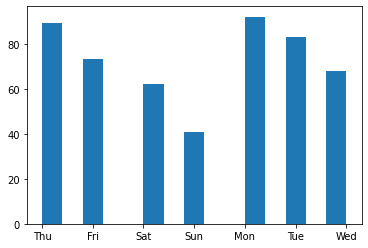

In [27]:
# Create a graph by day of week when the email was sent
# Does there seem to be a difference in terms of the day of the week a fraudulent email was sent?

import matplotlib.pyplot as plt

plt.hist(dayslist,bins=15);

# The frequency in which fraudulent emails are sent look higher during the weekdays compared to the weekend.

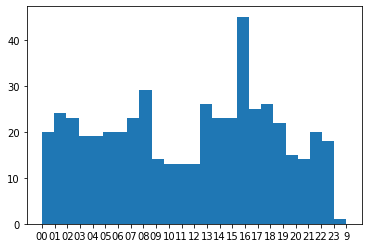

In [52]:
# Create a graph by hour of day when the email was sent
# Does there seem to be a difference in terms of the hour of the day a fraudulent email was sent?

regex1 = "Date:\s+\w{3},\s\d{1,2}\s\w{3}\s(\d{4})\s(\d+):\d+:\d+"
regex2 = "Date:\w{3},\s+\d{1,2}\s\w{3}\s(\d{4})\s(\d+):\d+:\d+"

hlist = []
for exp in [regex1,regex2]:
    fromMatch = re.finditer(exp,text)
    for words in fromMatch:
        year = words.group(1)
        hour = words.group(2)
        if int(year) < 1998:
            continue
        else:
            hlist.append(hour)
hlist.sort()
plt.hist(hlist, bins=25);

# We see a huge spike in emails around 4-5PM and then a big drop off afterwards.  In the mornings around 8AM, we
# see a low frequency of emails while beginning at midnight to 7-8AM, we start off with a larger frequency of emails.